# Testing the coal_times function

Here we will test the function of coal_times.py that simulates values of $(T_{k}, T_{k-1}, ... T_{2})$ based on a ms command. For each $T_{k}$ we will trace the corresponding $IICR_{k}$.

Importing the necessary functions
--------------------------------------

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import coal_times
from coal_times import simulate_coalescence_times, compute_empirical_dist

%matplotlib inline

Simulating the coalescence times. Constant size.
-------------------------------------------------------

In [2]:
ms_cmd = "./ms 5 100000 -T"
time_intervals = np.arange(0, 1, 0.01)
coalescence_times = simulate_coalescence_times(ms_cmd)

Doing the plot of the IICRs
-------------------------------

/home/willy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide
/home/willy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide


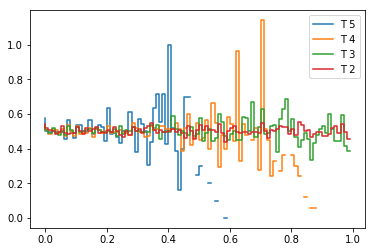

In [3]:
sample_size = len(coalescence_times[0, :]) + 1 # The number of lineages to trace back
nb_of_genes = len(coalescence_times[:, 0])
for k in np.arange(sample_size, 1, -1):
    (F_t, f_t) = compute_empirical_dist(obs=coalescence_times[:, sample_size - k], x_vector=time_intervals)
    factor = misc.comb(k, 2)
    IICR_k = factor * np.true_divide(nb_of_genes-F_t, f_t)
    plt.step(time_intervals, IICR_k, label = "T {}".format(k))
    plt.legend(loc="best")


Simulating coalescence times. Exponential grow.
------------------------------------------------------

In [4]:
ms_cmd = "./ms 5 100000 -T -G 2"
time_intervals = np.arange(0, 1, 0.01)
coalescence_times = simulate_coalescence_times(ms_cmd)

Doing the plot of the IICRs
-------------------------------

/home/willy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide
/home/willy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide


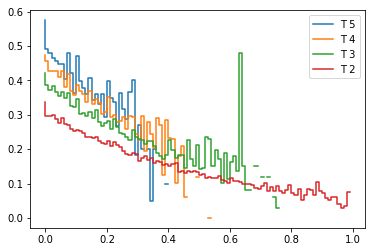

In [5]:
sample_size = len(coalescence_times[0, :]) + 1 # The number of lineages to trace back
nb_of_genes = len(coalescence_times[:, 0])
for k in np.arange(sample_size, 1, -1):
    (F_t, f_t) = compute_empirical_dist(obs=coalescence_times[:, sample_size - k], x_vector=time_intervals)
    factor = misc.comb(k, 2)
    IICR_k = factor * np.true_divide(nb_of_genes-F_t, f_t)
    plt.step(time_intervals, IICR_k, label = "T {}".format(k))
    plt.legend(loc="best")

# The coalescence times under the n-island model

Simulating coalescence times
--------------------------------

In [6]:
ms_cmd = "./ms 5 100000 -T -I 10 5 0 0 0 0 0 0 0 0 0 1"
time_intervals = np.arange(0, 2, 0.01)
coalescence_times = simulate_coalescence_times(ms_cmd)

Doing the plot of the IICRs
-------------------------------

/home/willy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


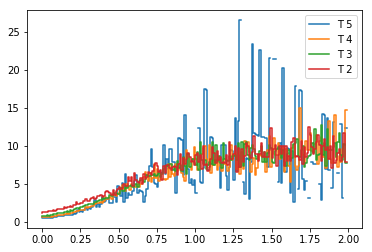

In [7]:
sample_size = len(coalescence_times[0, :]) + 1 # The number of lineages to trace back
nb_of_genes = len(coalescence_times[:, 0])
for k in np.arange(sample_size, 1, -1):
    (F_t, f_t) = compute_empirical_dist(obs=coalescence_times[:, sample_size - k], x_vector=time_intervals)
    factor = misc.comb(k, 2)
    IICR_k = factor * np.true_divide(nb_of_genes-F_t, f_t)
    plt.step(time_intervals, IICR_k, label = "T {}".format(k))
    plt.legend(loc="best")